<a href="https://colab.research.google.com/github/Nazhan99/Tensorflow_notes/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to regression with neural network in tensorflow



In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
##Create data to view and fit

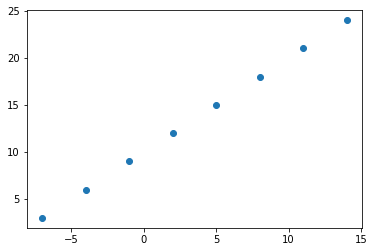

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X= np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y)

In [4]:
y== X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###input and output shapes

In [5]:
#create a demo  tensor for our housing price prediction problem
house_info= tf.constant(["bedroom", 'bathroom', 'garage'])
house_price= tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
#turn numpy array to tensor
X=tf.constant(X)
y=tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape= X[0].shape
output_shape= y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

###Steps in modelling with tensorflow

1. Create a model (define input and output)
2. compiling model (loss function and optimize)
3.  fitting the model (predict the output)

In [11]:
#set random seed
tf.random.set_seed(42)

#1.create a model using the sequential API
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #Stocastic gradient descent
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 495ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
#try and make a predictioons using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

###improving the model


In [13]:
#lets rebuild our model

#1.create the model
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

#2. compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 462ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [14]:
#try and make a predictioons using our model
y_pred=model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [25]:
#create the model (with extra hidden layer)
model= tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. compiling the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 12.7968 - mae: 12.7968
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.2606 - mae: 12.2606
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7207 - mae: 11.7207
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1925 - mae: 11.1925
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6467 - mae: 10.6467
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0857 - mae: 10.0857
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5001 - mae: 9.5001
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8822 - mae: 8.8822
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2260 - mae: 8.2260
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5238 - mae: 7.5238
Epoch 11/100
1/1 [==============================] - 0s 7ms/step -

In [26]:
model.predict([17.0])

array([[31.360924]], dtype=float32)